## 한글문서 내 단어 빈도수 분석 및 워드클라우드로 시각
1. 한글 문서에서 명사만 추출 : koNLPy 라이브러리 활용
1. 명사에 대한 빈도수 분석 : collections.Counter 활용 (built-in)
1. 상위 빈도수 명사에 대해서 워드클라우드 생성 : WordCloud 라이브러리 활용

### koNLPy 라이브러리 설치
1. 설치 기본 사항 확인 : 윈도우 비트 수, 파이썬 버전, JDK (1.7 이상)
2. 환경변수의 시스템 변수 설정 : JAVA_HOME = JDK 설치된 경로

In [1]:
!python -m pip install --upgrade konlpy

In [2]:
#설치 확인용
#실행했을 때 찾을 수 없다고 나오지 않으면 제대로 설치된 것
from konlpy.tag import Hannanum

aaa = Hannanum()
x = aaa.morphs("오늘 그래도 설치가 잘 되는군요") #morph : 형태소라는 뜻
x

['오늘', '그래도', '설치', '가', '잘', '되', '는군요']

### WordCloud 라이브러리 설치

In [3]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/5a/5f/f4164295d6853ec6203bc728dea4da76a7145ba70482eab9e994d26e0e13/wordcloud-1.9.2-cp310-cp310-win_amd64.whl.metadata
   ---------------------------------------- 0.0/152.1 kB ? eta -:--:--
   ---------------------------------------- 152.1/152.1 kB 4.4 MB/s eta 0:00:00


# 1. 데이터 준비
1. 데이터 로딩 (파이썬 객체로)
1. 분석할 데이터 추출 및 정제
1. 명사 데이터만 추출

### 1-1. 파일 읽기 (json 파일을 파이썬 객체로 로딩하기) : json.load

In [4]:
import json

filename="강아지_news.json"
with open(filename, "r", encoding="utf8") as infile:
    data = json.load(infile)
data

[{'title': "[팝업★]'나솔' 16기 영숙, 돌연 前남편 공개 &quot;찢어 죽이고 싶은 사람이었지만...",
  'originallink': 'http://biz.heraldcorp.com/view.php?ud=202310041810416351505_1',
  'link': 'https://n.news.naver.com/mnews/article/112/0003656725?sid=106',
  'description': '공개된 사진 속에는 글로 언급했던 <b>강아지</b> 모양의 케이크부터 토끼 솜사탕, 그리고 전 남편으로 보이는 남성과 아들이 놀고 있는 모습까지 가득 담겨 있어 눈길을 끈다. 영숙의 꽉찬 연휴 모음집에 댓글들도 폭발했다.... ',
  'pubDate': 'Wed, 04 Oct 2023 18:27:00 +0900',
  'index': 0},
 {'title': '[미래인재를 키우는 충남교육 참학력] AI와 함께 미래로!… 천안교육지원청',
  'originallink': 'http://www.joongdo.co.kr/web/view.php?key=20231004010000457',
  'link': 'http://www.joongdo.co.kr/web/view.php?key=20231004010000457',
  'description': '관내 모든 초·중학생들에게 교과·창의적 체험활동 연계한 AI교육 프로그램을 제공하고 있으며 교육내용은 천안AI꿈키움터에서 자체개발한 교육프로그램인 날씨 예측 로봇 만들기, 음식주문 챗봇 만들기, <b>강아지</b> 로봇... ',
  'pubDate': 'Wed, 04 Oct 2023 17:46:00 +0900',
  'index': 1},
 {'title': "오늘의집, 세계 동물의 날 기념 선물캠페인 '코코야 고마워' 진행",
  'originallink': 'http://www.ftoday.co.kr/news/articleView.html?idxno=309864',
  'link': '

### 1-2. 분석할 데이터 추출 및 정제
* re : regular expression
  - re.sub(matching_pattern, replace_string, target_string)
  - (예)re.sub([a-zA-Z], "", target) : target에서 모든 알파벳을 제거("")
  - (예)re.sub([^가-힣], "", target) : target에서 한글이 아닌(^) 모든 문자를 제거("")
  
 https://wikidocs.net/4308

In [7]:
#json 데이터 중 본문에 해당하는 부분을 가져와서 정제한 후 통합하기
#특수문자를 제거하거나...
import re #regular Expression
total_result = ''

for item in data:
    clean_data = re.sub(r'[\W]', ' ', item['description'])
    total_result += clean_data
total_result

'공개된 사진 속에는 글로 언급했던  b 강아지  b  모양의 케이크부터 토끼 솜사탕  그리고 전 남편으로 보이는 남성과 아들이 놀고 있는 모습까지 가득 담겨 있어 눈길을 끈다  영숙의 꽉찬 연휴 모음집에 댓글들도 폭발했다     관내 모든 초 중학생들에게 교과 창의적 체험활동 연계한 AI교육 프로그램을 제공하고 있으며 교육내용은 천안AI꿈키움터에서 자체개발한 교육프로그램인 날씨 예측 로봇 만들기  음식주문 챗봇 만들기   b 강아지  b  로봇    오늘의집은 고객이 필요한 상품을 쉽게 찾도록  b 강아지  b   고양이 별로  리빙  푸드  배변 위생용품의 세부 테마로 나누어 상품 큐레이션을 준비했다  매트  하우스  계단  쿠션 등  b 강아지  b  리빙 상품부터 사료  간식       연인 파트2    오늘도 사랑스럽개  등 뉴 페이스 등장 남궁민과 안은진의 애절한 감정선이 한층 깊어져 돌아온  연인 파트2 와  b 강아지  b 상의 대명사 차은우와 박규영의  오늘도 사랑스럽개 가 10월 신작으로 웨이브를    또  당시 내겐 엄마와 외할머니   b 강아지  b 뿐이었다 며  엄마는 마음 아파했지만 묵묵히 나를 지켜보며 내가 세상 밖으로 나갈 수 있도록 응원을 해주셨다 라며  내 유일한 친구는 라디오였다  하루종일 라디오에서    뉴시스 두 번째 열애설은 이른바  버닝썬 논란 이 터진 후인 2020년 3월 9일 승리가 강원도 철원의 신병교육대에 입소할 때 승리의 차 안에 유혜원과 그의 반려견으로 보이는  b 강아지  b 가 타고 있는 모습이 찍히며     아이콘링크의  b 강아지  b  영양제 브랜드  해피마이펫 이 론칭과 함께 신제품 슈퍼브레스  b 강아지  b  기관지 영양제를 출시했다고 4일 밝혔다   b 강아지  b  기관지 협착증이란 호흡기가 좁아지는 현상을 말하는데  발생 요인은    한편  b 강아지  b 에게 쉽게 발생하는 피부질환  농피증 도 알아본다   b 강아지  b  얼굴 주위와 겨드랑이  등 부위 피부에 세균이 침투해 고름이 차

### 1-3. 품사 태깅 : 명사 추출
* koNLPy 내 Okt 라이브러리 활용

https://konlpy.org/en/latest/

In [11]:
from konlpy.tag import Okt

okt = Okt()
total_reseult_noun = okt.nouns(total_result)
total_reseult_noun

['공개',
 '사진',
 '속',
 '글',
 '언급',
 '강아지',
 '모양',
 '케이크',
 '토끼',
 '솜사탕',
 '전',
 '남편',
 '남성',
 '아들',
 '모습',
 '가득',
 '눈길',
 '숙의',
 '연휴',
 '모음',
 '집',
 '댓글',
 '폭발',
 '관내',
 '모든',
 '초',
 '중학생',
 '교과',
 '창의',
 '체험',
 '활동',
 '계',
 '교육',
 '프로그램',
 '제공',
 '교육',
 '내용',
 '천안',
 '꿈',
 '터',
 '자체',
 '개발',
 '교육',
 '프로그램',
 '날씨',
 '예측',
 '로봇',
 '만들기',
 '음식',
 '주문',
 '챗봇',
 '만들기',
 '강아지',
 '로봇',
 '오늘',
 '고객',
 '상품',
 '강아지',
 '고양이',
 '별로',
 '리빙',
 '푸드',
 '배변',
 '위생용품',
 '세부',
 '테마',
 '상품',
 '큐',
 '레이',
 '션',
 '준비',
 '매트',
 '하우스',
 '계단',
 '쿠션',
 '등',
 '강아지',
 '리빙',
 '상품',
 '사료',
 '간식',
 '연인',
 '파트',
 '오늘',
 '개',
 '등',
 '뉴',
 '페이스',
 '등장',
 '남궁민',
 '안은진',
 '감',
 '정선',
 '한층',
 '연인',
 '파트',
 '강아지',
 '상의',
 '대명사',
 '차',
 '은우',
 '박규영',
 '오늘',
 '개',
 '신작',
 '웨이브',
 '또',
 '당시',
 '내겐',
 '엄마',
 '외할머니',
 '강아지',
 '며',
 '엄마',
 '마음',
 '내',
 '세상',
 '밖',
 '수',
 '응원',
 '라며',
 '내',
 '친구',
 '라디오',
 '하루',
 '종일',
 '라디오',
 '뉴시스',
 '두',
 '열애설',
 '버닝썬',
 '논란',
 '이',
 '후',
 '승리',
 '강원도',
 '철원',
 '신병교육대',
 '입소',
 '때',
 '승리',
 '차'

## 2. 데이터 탐색 및 분석

### 2-1. 단어 빈도 탐색 : collections.Counter
* from collections import Counter
   - *counterObject* = **Counter**(*pyObject*)
       - 데이터 집합에서 개수를 자동으로 계산
   - *counterObject*.most_common**(*number*)
       - 빈도수가 높은 상위 number개의 데이터만 추출

https://docs.python.org/3/library/collections.html#collections.Counter

In [12]:
from collections import Counter

count = Counter(total_reseult_noun)
count

Counter({'강아지': 126,
         '고양이': 28,
         '등': 23,
         '오늘': 22,
         '수': 20,
         '가장': 20,
         '반려동물': 17,
         '배변': 15,
         '파트': 15,
         '개': 15,
         '차': 15,
         '이': 15,
         '상품': 14,
         '연인': 14,
         '입양': 14,
         '동네': 14,
         '내겐': 13,
         '위': 13,
         '때문': 13,
         '코코': 13,
         '처럼': 13,
         '집': 12,
         '당시': 12,
         '개인': 12,
         '스스로': 12,
         '연기': 12,
         '못': 12,
         '현장': 12,
         '늘': 12,
         '여기저기': 12,
         '누비': 12,
         '분위기': 12,
         '일터': 12,
         '최우식': 12,
         '리빙': 11,
         '푸드': 11,
         '영암군': 11,
         '편': 11,
         '은우': 10,
         '인기': 10,
         '이름': 10,
         '진행': 10,
         '거인': 10,
         '마리': 10,
         '사진': 9,
         '위생용품': 9,
         '남궁민': 9,
         '안은진': 9,
         '상의': 9,
         '대명사': 9,
         '그': 9,
         '펫': 9,
         '가족': 9

## 2-2. 데이터 분석에 활용할 데이터 추출

In [14]:
# 출현 횟수가 많은 상위 80개의 단어 중에서 단어길이가 1보다 큰 것만 추출
number = 80
word_count = dict()
for word, counts in count.most_common(number):
    if len(word) > 1:
        word_count[word] = counts
word_count

{'강아지': 126,
 '고양이': 28,
 '오늘': 22,
 '가장': 20,
 '반려동물': 17,
 '배변': 15,
 '파트': 15,
 '상품': 14,
 '연인': 14,
 '입양': 14,
 '동네': 14,
 '내겐': 13,
 '때문': 13,
 '코코': 13,
 '처럼': 13,
 '당시': 12,
 '개인': 12,
 '스스로': 12,
 '연기': 12,
 '현장': 12,
 '여기저기': 12,
 '누비': 12,
 '분위기': 12,
 '일터': 12,
 '최우식': 12,
 '리빙': 11,
 '푸드': 11,
 '영암군': 11,
 '은우': 10,
 '인기': 10,
 '이름': 10,
 '진행': 10,
 '거인': 10,
 '마리': 10,
 '사진': 9,
 '위생용품': 9,
 '남궁민': 9,
 '안은진': 9,
 '상의': 9,
 '대명사': 9,
 '가족': 9,
 '영화': 9,
 '번식': 9,
 '별로': 8,
 '세부': 8,
 '등장': 8,
 '정선': 8,
 '한층': 8,
 '박규영': 8,
 '양제': 8,
 '황토': 8,
 '물감': 8,
 '변신': 8,
 '캔버스': 8,
 '립하': 8,
 '정웅': 8,
 '미술관': 8,
 '기생충': 8,
 '댓글': 7,
 '고객': 7,
 '반려견': 7,
 '영암': 7,
 '명물': 7}

# 3. 시각화
## 3-1. 워드클라우드 : WordCloud
1. wordcloud 객체 생성 : *wordcloudObject* = **WordCloud**(*font_path*, *optional_parameters*)
1. 빈도기반으로 wordcloud 이미지 생성 : *wordcloudObject* = *wordcloudObject*.**generate_from_frequencies**(*frequencies[, …]*)
1. matplotlib.pyplot으로 시각화
    1. (생략가능) 특정 option으로 figure 생성 : *plt*.**figure**(*optional parameters*)
    1. 빈도수 기반의 wordcloud 객체를 입력으로 image 생성 : *plt*.**imshow**(*array-like data*)
    1. 축이 보이지 않도록 off : *plt*.**axis**('off')
    1. plt.show()
1. 생성한 wordcloud 이미지를 파일로 저장 : *wordcloudObject*.**to_file**(*filename*)

https://amueller.github.io/word_cloud/index.html

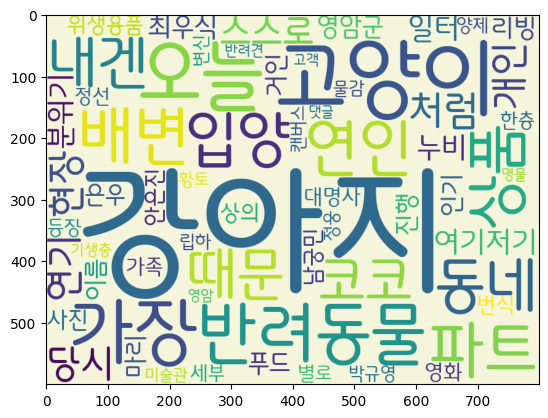

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_path = "C:\Windows\Fonts\MalangmalangR.ttf"
wordcloud = WordCloud(font_path, background_color="beige", width=800, height=600)
wordcloud_freq = wordcloud.generate_from_frequencies(word_count)

plt.imshow(wordcloud_freq)
plt.show()